In [1]:
from utils.ModelWrapper import ModelWrapper
from models.DLinear.Model import Model as DLinear
from models.PatchTST.Model import Model as PatchTST
from models.SegRNN.Model import Model as SegRNN
import torch
import matplotlib.pyplot as plt
from utils.generate_config import get_config_for

In [2]:
config = get_config_for('ETTh1.csv', 720, training_type='normal')
config_patchtst = get_config_for('ETTh1.csv', 720, model='PatchTST', training_type='normal')

In [3]:
model_wrapper_DLinear = ModelWrapper(DLinear, config)
model_wrapper_SegRNN = ModelWrapper(SegRNN, config)
model_wrapper_PatchTST = ModelWrapper(PatchTST, config_patchtst)
models = [model_wrapper_DLinear, model_wrapper_SegRNN, model_wrapper_PatchTST]

Loading trained model from:  ./trained_models/DLinear/ETTh1/720/normal
test 2161


Loading trained model from:  ./trained_models/SegRNN/ETTh1/720/normal
test 2161
Loading trained model from:  ./trained_models/PatchTST/ETTh1/720/normal
test 2161


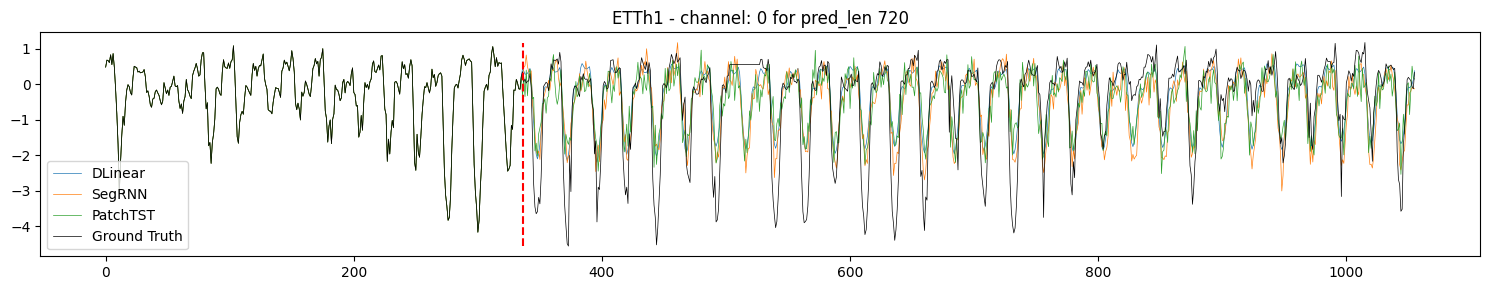

In [4]:
%matplotlib inline
batch_idx = 0
channel_idx = 0
plt.figure(figsize=(15, 3))
for model_wrapper in models:
    model_wrapper.train()
    _, test_loader = model_wrapper.get_data('test')
    for (batch_x, batch_y, _, _) in test_loader:
        break
    batch_x = batch_x.float().cuda()
    batch_y = batch_y[:, -model_wrapper.config.pred_len:, :]
    y_pred = model_wrapper.forward(batch_x).detach()

    true = torch.concatenate([batch_x.cpu()[batch_idx, :, channel_idx], batch_y[batch_idx, :, channel_idx]])
    pred = torch.concatenate([batch_x.cpu()[batch_idx, :, channel_idx], y_pred.cpu()[batch_idx, :, channel_idx]])
    plt.plot(pred, label=str(model_wrapper), linewidth=0.5)
plt.plot(true, label='Ground Truth', linewidth=0.5, color='black')
plt.vlines(model_wrapper.config.seq_len, torch.min(true.min(), pred.min()), torch.max(true.max(), pred.max()), colors='r', linestyles='dashed')
plt.title(f'{model_wrapper.config.data_path.split(".")[0]} - channel: {channel_idx} for pred_len {model_wrapper.config.pred_len}')
plt.legend()
plt.tight_layout()
plt.show()